In [2]:
import sys
sys.path.append('../')

import keras_tuner as kt
import pandas as pd
import tensorflow as tf
from Utils import *

## LSTM-CNN Model

#### Import data (ESC-10)

In [3]:
# import the .pkl file
df = pd.read_pickle("../esc10.pkl")
print('Shape of the dataframe:', df.shape)
mel_shape = df.mel_spectrogram[0].shape
print('Shape of a mel spectrogram:', mel_shape)
df.head()

Shape of the dataframe: (1600, 4)
Shape of a mel spectrogram: (128, 155)


,mel_spectrogram,target,fold,original
0,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,True
1,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
2,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
3,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
4,"[[0.9999999, 0.851576, 0.36829507, 0.39175826,...",0,1,True


#### Define the initialization model function

hidden_size : 64 \
lstm_dropout : 0.2 \
conv_1_filters : 80 \
conv_1_kernel_size : 5 \
pool_1_size : 4 \
conv_2_filters : 48 \
conv_2_kernel_size : 5 \
pool_2_size : 5 \
dense_neurons : 96 \
dense_layer_activation : relu \
dense_dropout : 0.3 

In [4]:
def init_model():
    inputs = tf.keras.Input(shape=(mel_shape[0], mel_shape[1]))
    x = tf.keras.layers.Permute((2, 1))(inputs)


    x = tf.keras.layers.LSTM(64, dropout=0.2, return_sequences=True)(x)

    # x = tf.keras.layers.Permute((2, 1))(x)
    x = tf.keras.layers.Reshape((x.shape[1], x.shape[2], 1))(x)

    x = tf.keras.layers.Conv2D(80, 5, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(4, 4))(x)
    x = tf.keras.layers.Conv2D(48, 5, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(5, 5))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(96, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # compile
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model 

#### Model Summary

In [5]:
model = init_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 155)]        0         
                                                                 
 permute (Permute)           (None, 155, 128)          0         
                                                                 
 lstm (LSTM)                 (None, 155, 64)           49408     
                                                                 
 reshape (Reshape)           (None, 155, 64, 1)        0         
                                                                 
 conv2d (Conv2D)             (None, 151, 60, 80)       2080      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 15, 80)       0         
 )                                                               
                                                             

#### Training and results

Fold 1/5
Pre-training accuracy: 10.000000149011612 %
Epoch 1/20
40/40 [==============================] - 13s 263ms/step - loss: 1.9968 - accuracy: 0.2859 - val_loss: 1.5487 - val_accuracy: 0.4875
Epoch 2/20
40/40 [==============================] - 11s 270ms/step - loss: 1.4654 - accuracy: 0.4555 - val_loss: 1.3289 - val_accuracy: 0.5500
Epoch 3/20
40/40 [==============================] - 10s 256ms/step - loss: 1.1430 - accuracy: 0.5984 - val_loss: 1.2928 - val_accuracy: 0.6125
Epoch 4/20
40/40 [==============================] - 11s 265ms/step - loss: 0.9062 - accuracy: 0.6734 - val_loss: 1.2569 - val_accuracy: 0.5625
Epoch 5/20
40/40 [==============================] - 10s 256ms/step - loss: 0.7167 - accuracy: 0.7539 - val_loss: 1.2358 - val_accuracy: 0.6500
Epoch 6/20
40/40 [==============================] - 10s 254ms/step - loss: 0.6049 - accuracy: 0.7742 - val_loss: 1.3849 - val_accuracy: 0.6125
Epoch 7/20
40/40 [==============================] - 10s 251ms/step - loss: 0.5041 - accur

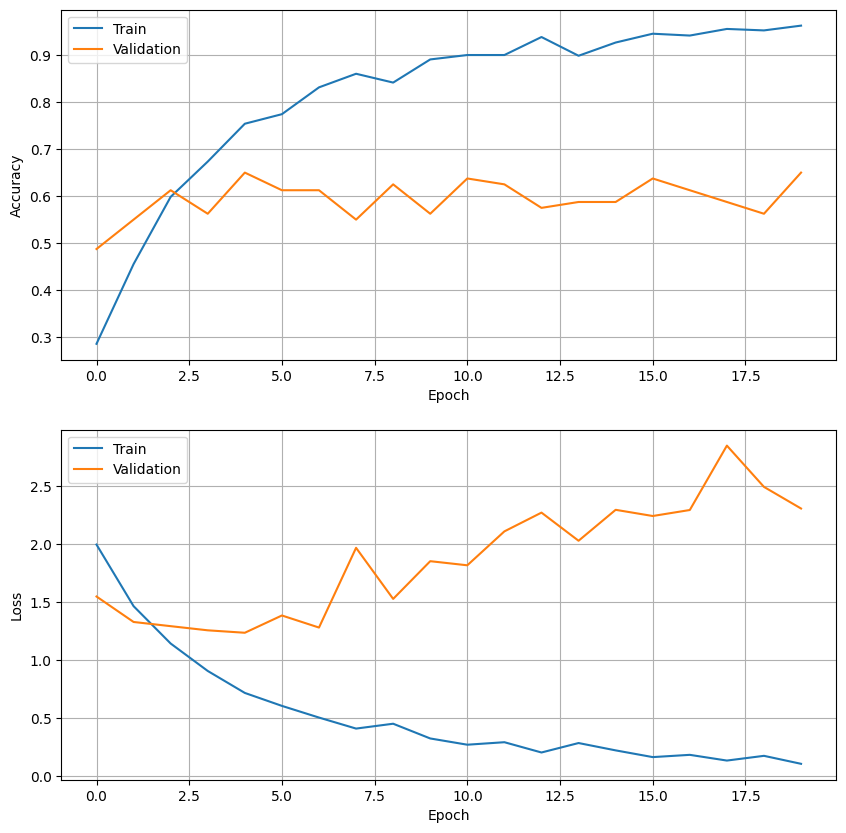

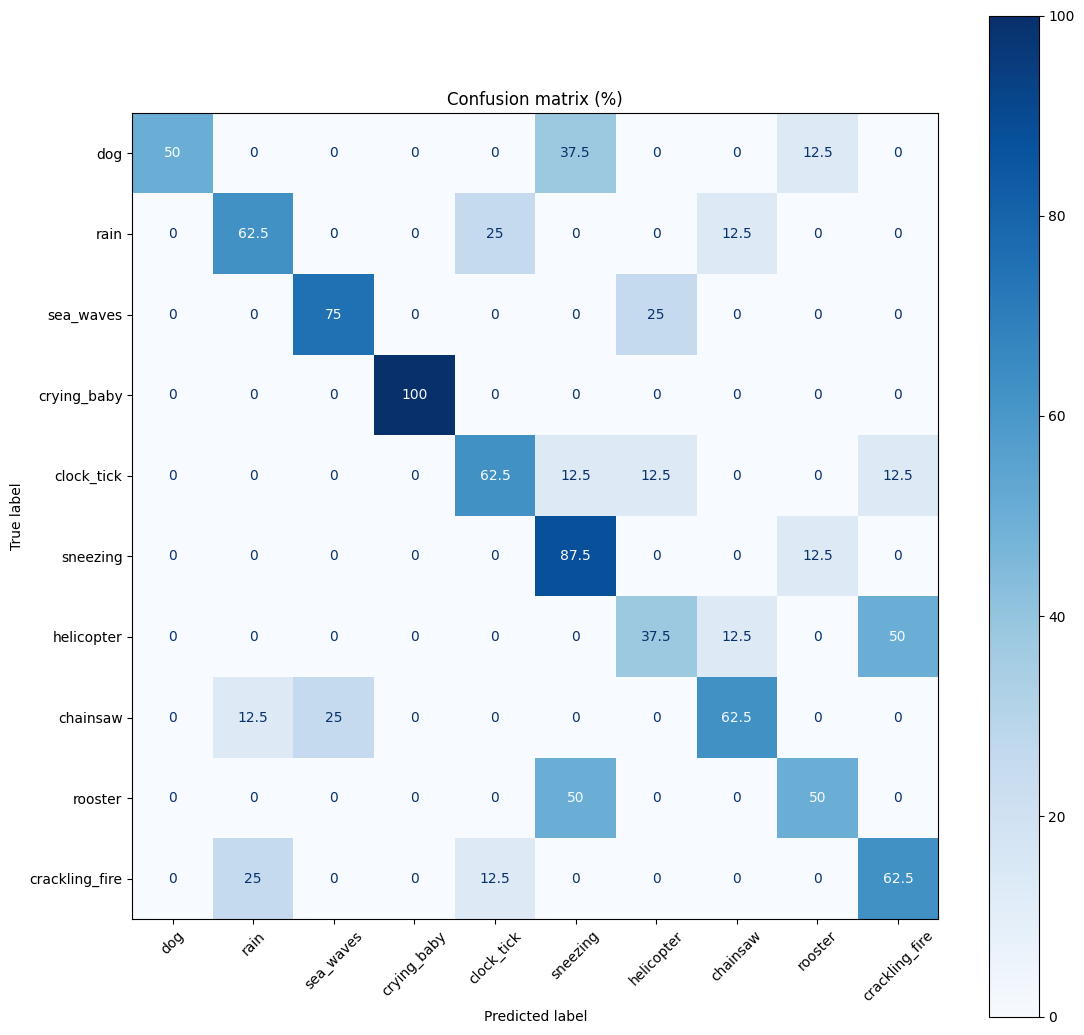

Fold 2/5
Pre-training accuracy: 3.750000149011612 %
Epoch 1/20
40/40 [==============================] - 13s 277ms/step - loss: 2.1316 - accuracy: 0.1883 - val_loss: 1.7248 - val_accuracy: 0.3500
Epoch 2/20
40/40 [==============================] - 11s 265ms/step - loss: 1.5478 - accuracy: 0.4172 - val_loss: 1.1879 - val_accuracy: 0.6625
Epoch 3/20
40/40 [==============================] - 11s 267ms/step - loss: 1.2008 - accuracy: 0.5711 - val_loss: 0.9982 - val_accuracy: 0.6875
Epoch 4/20
40/40 [==============================] - 10s 256ms/step - loss: 1.0282 - accuracy: 0.6406 - val_loss: 1.0851 - val_accuracy: 0.6625
Epoch 5/20
40/40 [==============================] - 10s 251ms/step - loss: 0.8131 - accuracy: 0.7125 - val_loss: 0.7253 - val_accuracy: 0.8250
Epoch 6/20
40/40 [==============================] - 10s 253ms/step - loss: 0.6806 - accuracy: 0.7641 - val_loss: 0.7034 - val_accuracy: 0.7875
Epoch 7/20
40/40 [==============================] - 11s 265ms/step - loss: 0.5249 - accura

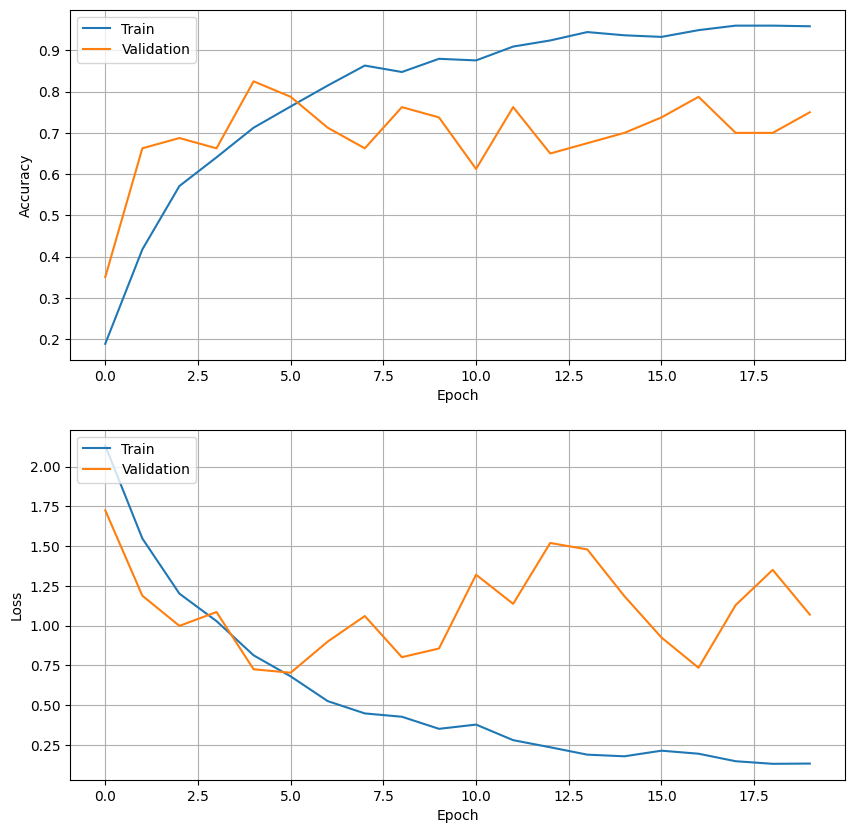

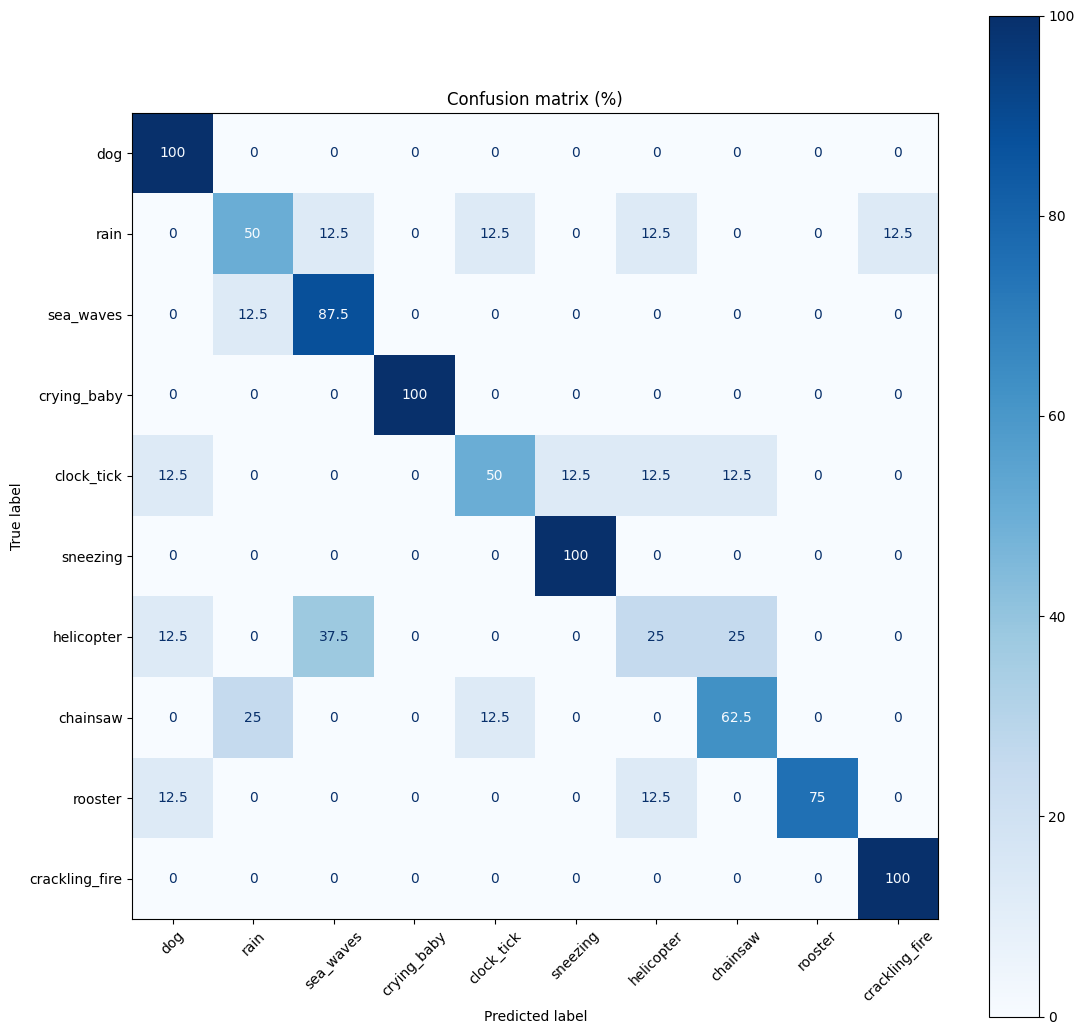

Fold 3/5
Pre-training accuracy: 8.749999850988388 %
Epoch 1/20
40/40 [==============================] - 13s 263ms/step - loss: 2.0549 - accuracy: 0.2352 - val_loss: 1.7680 - val_accuracy: 0.3875
Epoch 2/20
40/40 [==============================] - 11s 264ms/step - loss: 1.4264 - accuracy: 0.4953 - val_loss: 1.3291 - val_accuracy: 0.5125
Epoch 3/20
40/40 [==============================] - 10s 256ms/step - loss: 0.9772 - accuracy: 0.6680 - val_loss: 1.3052 - val_accuracy: 0.5625
Epoch 4/20
40/40 [==============================] - 10s 262ms/step - loss: 0.7838 - accuracy: 0.7445 - val_loss: 1.0756 - val_accuracy: 0.6250
Epoch 5/20
40/40 [==============================] - 10s 259ms/step - loss: 0.6219 - accuracy: 0.7891 - val_loss: 1.1583 - val_accuracy: 0.6375
Epoch 6/20
40/40 [==============================] - 11s 270ms/step - loss: 0.4520 - accuracy: 0.8523 - val_loss: 1.3098 - val_accuracy: 0.6625
Epoch 7/20
40/40 [==============================] - 11s 266ms/step - loss: 0.3997 - accura

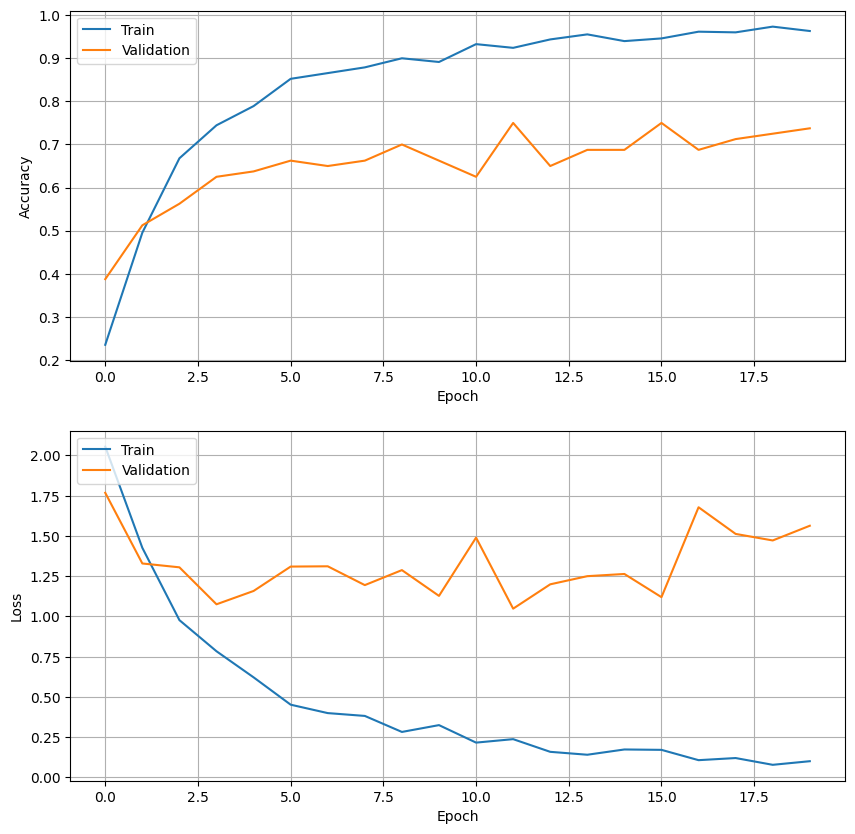

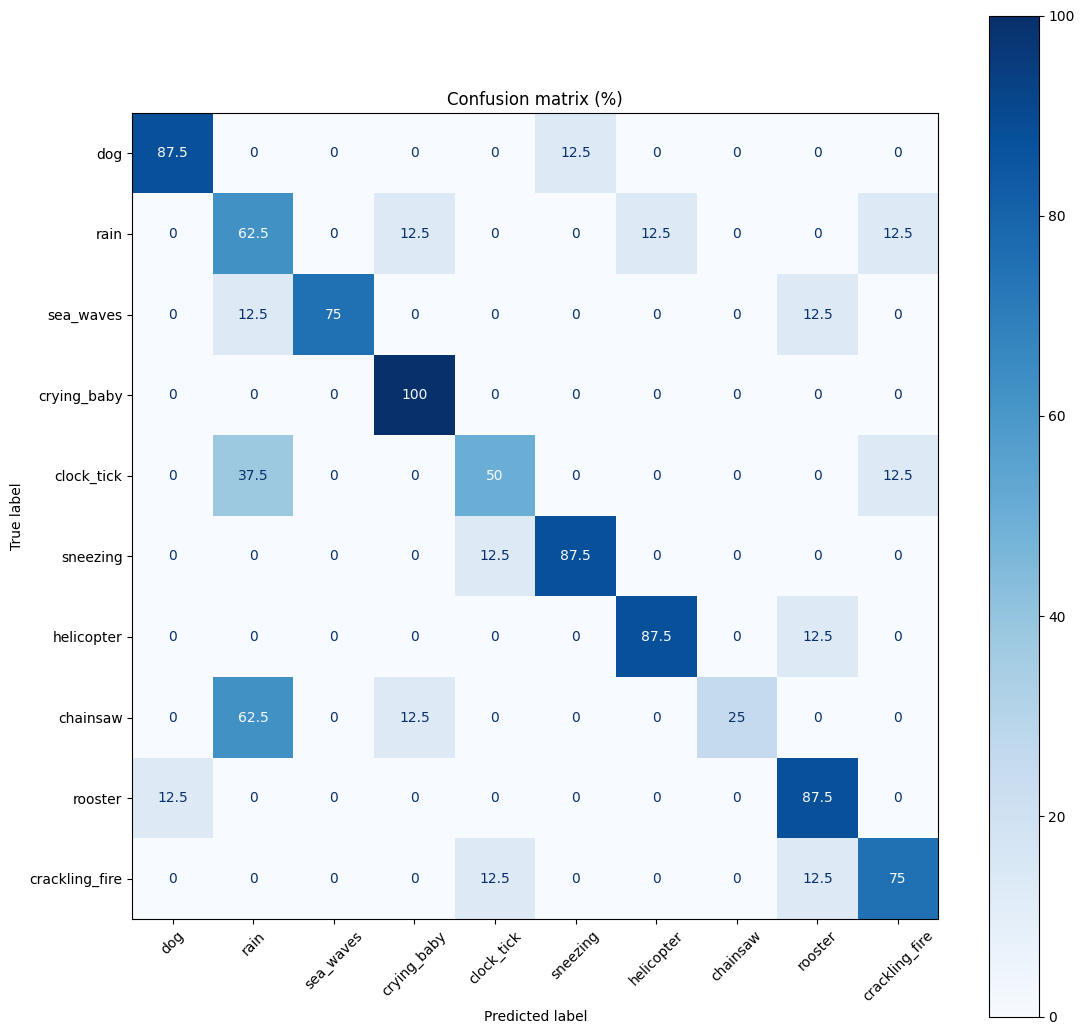

Fold 4/5
Pre-training accuracy: 10.000000149011612 %
Epoch 1/20
40/40 [==============================] - 13s 264ms/step - loss: 2.0152 - accuracy: 0.2352 - val_loss: 1.6583 - val_accuracy: 0.3625
Epoch 2/20
40/40 [==============================] - 11s 263ms/step - loss: 1.4642 - accuracy: 0.4609 - val_loss: 1.3939 - val_accuracy: 0.5250
Epoch 3/20
40/40 [==============================] - 11s 278ms/step - loss: 1.1373 - accuracy: 0.5906 - val_loss: 1.4057 - val_accuracy: 0.4875
Epoch 4/20
40/40 [==============================] - 10s 262ms/step - loss: 0.9366 - accuracy: 0.6680 - val_loss: 1.2474 - val_accuracy: 0.5500
Epoch 5/20
40/40 [==============================] - 11s 267ms/step - loss: 0.7419 - accuracy: 0.7586 - val_loss: 1.3306 - val_accuracy: 0.5125
Epoch 6/20
40/40 [==============================] - 10s 261ms/step - loss: 0.6357 - accuracy: 0.7984 - val_loss: 1.3982 - val_accuracy: 0.5250
Epoch 7/20
40/40 [==============================] - 11s 264ms/step - loss: 0.4560 - accur

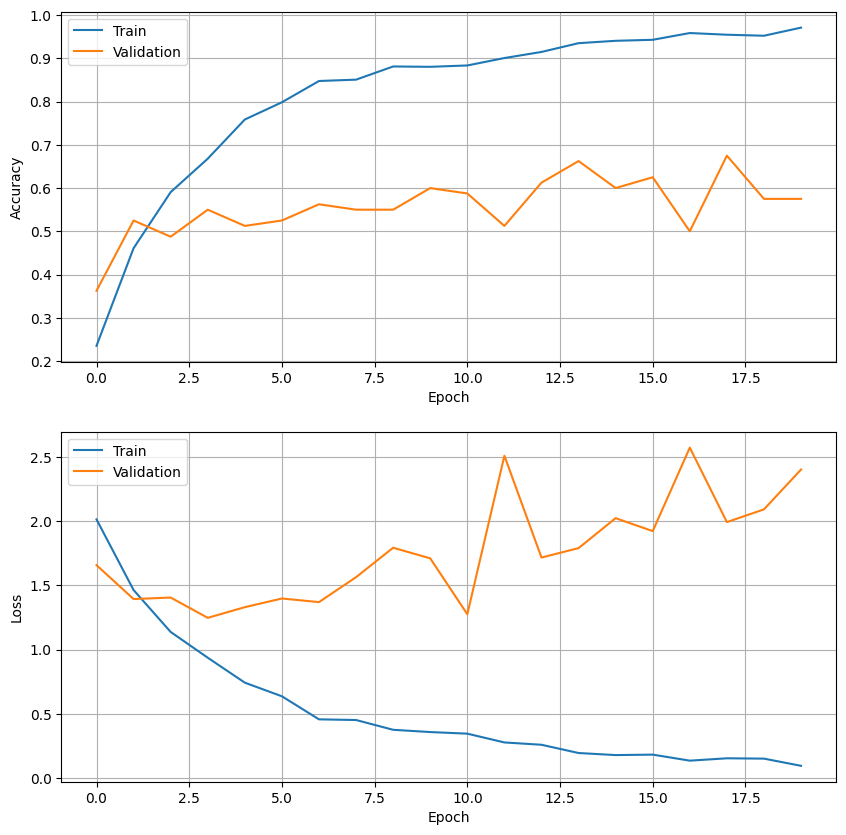

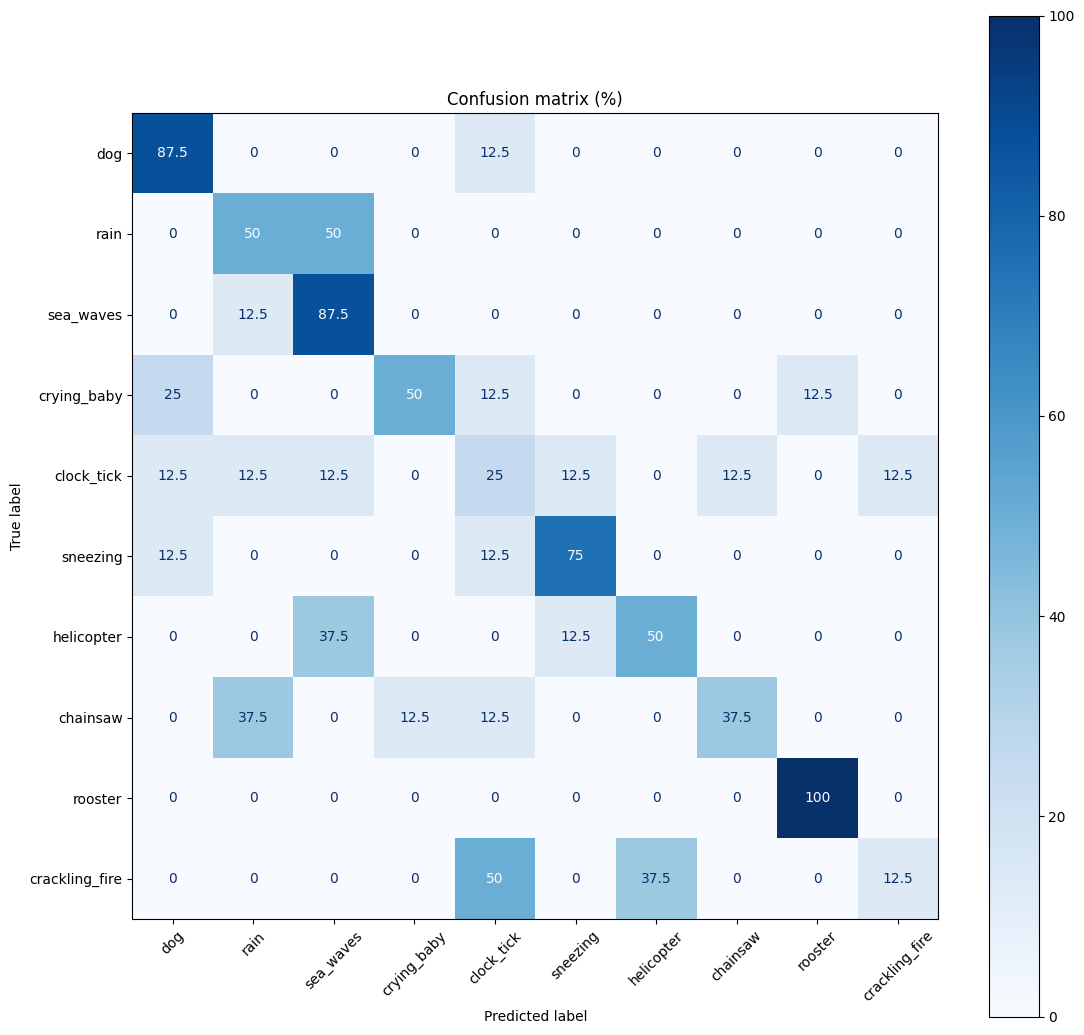

Fold 5/5
Pre-training accuracy: 13.750000298023224 %
Epoch 1/20
40/40 [==============================] - 12s 241ms/step - loss: 1.9668 - accuracy: 0.2594 - val_loss: 1.6203 - val_accuracy: 0.3250
Epoch 2/20
40/40 [==============================] - 9s 233ms/step - loss: 1.4114 - accuracy: 0.4773 - val_loss: 1.2734 - val_accuracy: 0.5250
Epoch 3/20
40/40 [==============================] - 12s 302ms/step - loss: 1.0970 - accuracy: 0.6156 - val_loss: 1.1586 - val_accuracy: 0.6500
Epoch 4/20
40/40 [==============================] - 10s 260ms/step - loss: 0.8618 - accuracy: 0.6945 - val_loss: 1.1645 - val_accuracy: 0.6375
Epoch 5/20
40/40 [==============================] - 12s 291ms/step - loss: 0.6964 - accuracy: 0.7352 - val_loss: 1.2953 - val_accuracy: 0.6875
Epoch 6/20
40/40 [==============================] - 11s 260ms/step - loss: 0.5816 - accuracy: 0.8055 - val_loss: 1.4724 - val_accuracy: 0.6000
Epoch 7/20
40/40 [==============================] - 13s 320ms/step - loss: 0.4809 - accura

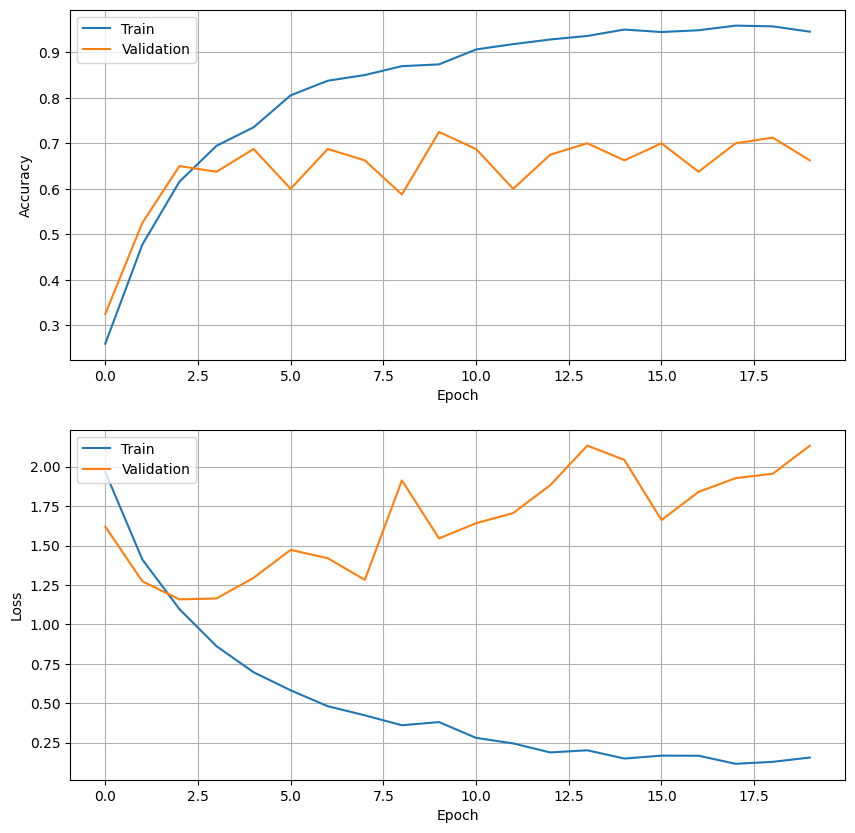

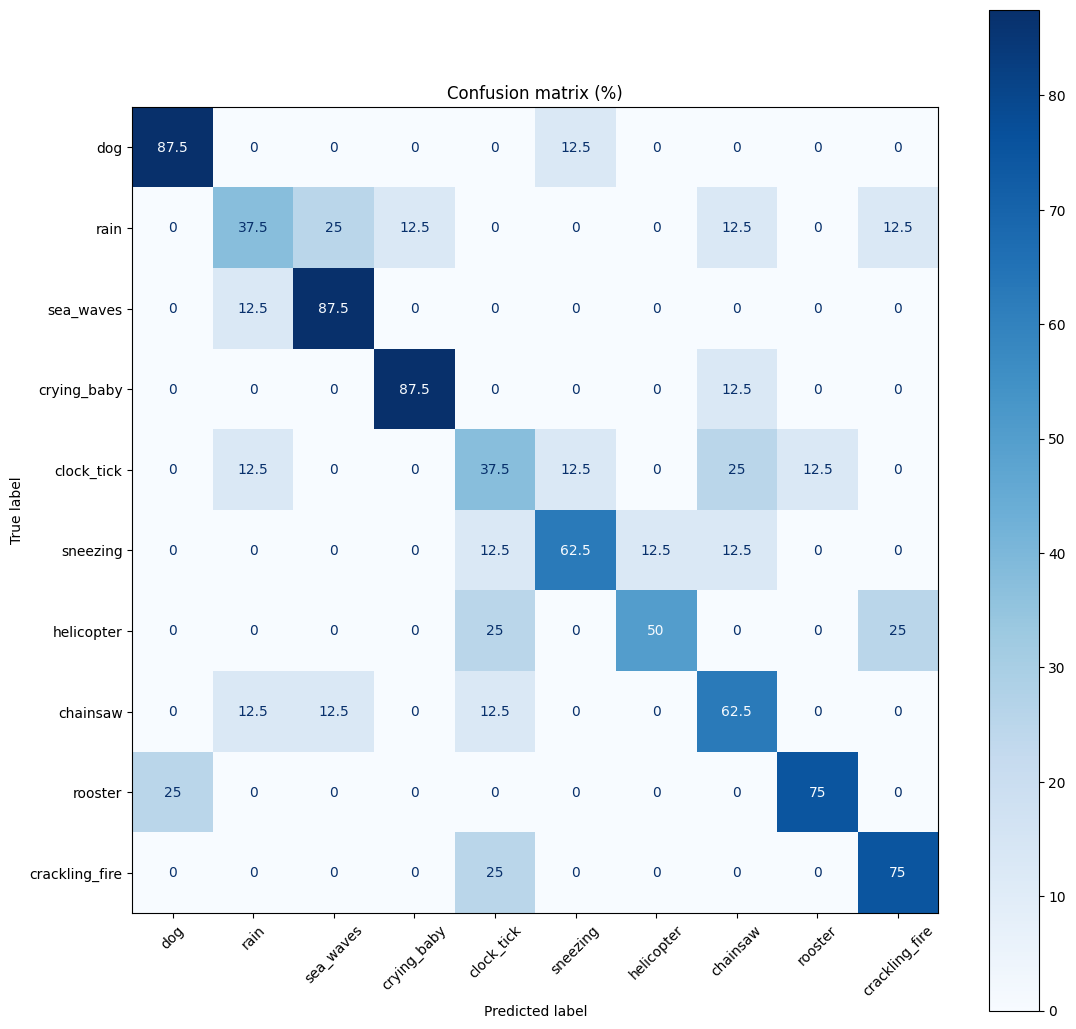

Average results:

Average accuracy: 0.96 ± 0.01
Average validation accuracy: 0.68 ± 0.06
Average loss: 0.12 ± 0.02
Average validation loss: 1.90 ± 0.51
Average training time: 208.42 ± 4.58 s

Plotting average results:



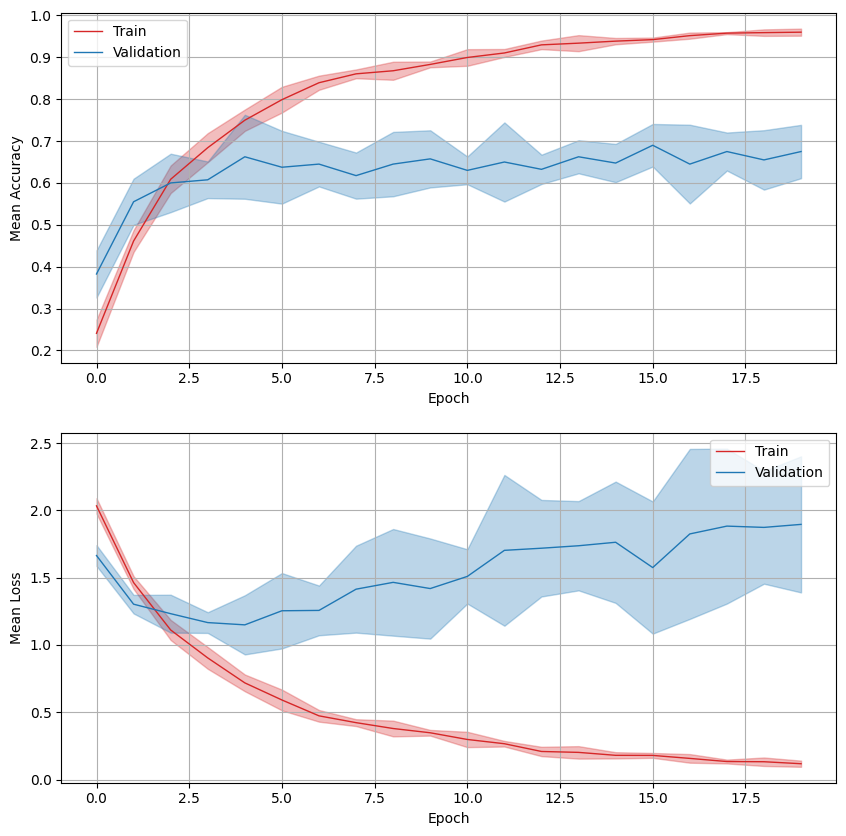

Average confusion matrix:



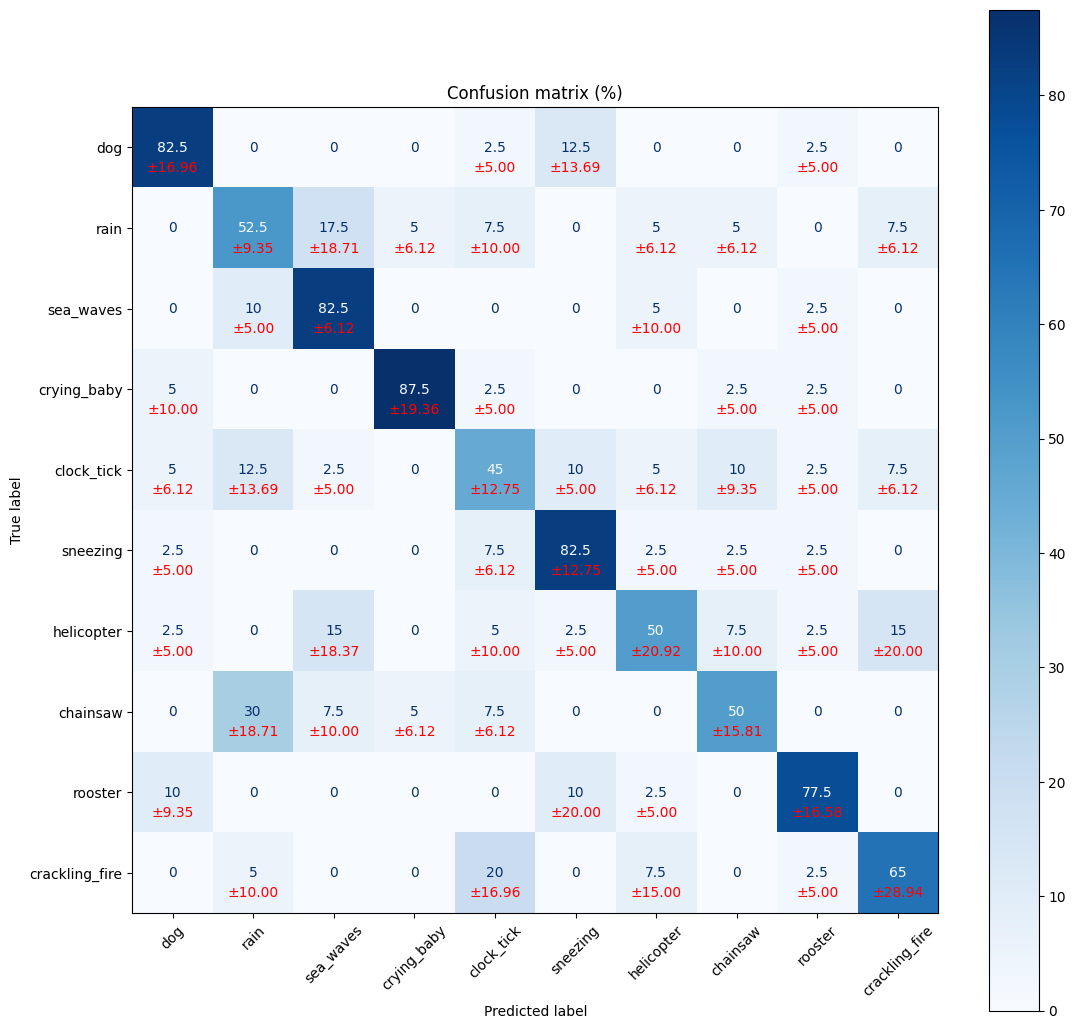

In [6]:
x_dim = (mel_shape[0], mel_shape[1])
history = cross_validation(df, init_model, X_dim=x_dim, n_folds=5, epochs=20, num_batch_size=32, verbose=1)